In [6]:
from __future__ import division
import datetime as dt
from collections import OrderedDict
import sys, os
import dateutil.relativedelta as rd

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

gtfstk_dir = '../../gtfstk/'
sys.path.append(gtfstk_dir)
import gtfstk as gt

data_dir = gtfstk_dir + 'data/'

%load_ext autoreload
%autoreload 2
%matplotlib inline  


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [7]:
# Import a feed
feed = gt.read_gtfs(data_dir + 'cairns_gtfs.zip')

# Set study date
date = gt.compute_busiest_date(feed, gt.get_first_week(feed))
date

'20140530'

In [8]:
gt.assess(feed)

has_shape_dist_traveled                                 False
num_missing_dists                                       37790
frac_missing_dists                                          1
has_direction_id                                         True
num_missing_directions                                      0
frac_missing_directions                                     0
num_trips_missing_shapes                                    0
frac_trips_missing_shapes                                   0
num_missing_departure_times                                65
frac_missing_departure_times                       0.00172003
num_missing_first_departure_times                           0
frac_missing_first_departure_times                          0
assessment                            probably a fixable feed
dtype: object

In [9]:
# Compute trips stats
trips_stats = gt.compute_trips_stats(feed)
trips_stats.head().T

,703,0,704,705,706
trip_id,CNS2014-CNS_MUL-Weekday-00-4165878,CNS2014-CNS_MUL-Saturday-00-4165937,CNS2014-CNS_MUL-Weekday-00-4165879,CNS2014-CNS_MUL-Weekday-00-4165880,CNS2014-CNS_MUL-Weekday-00-4165881
route_id,110-423,110-423,110-423,110-423,110-423
route_short_name,110,110,110,110,110
route_type,3,3,3,3,3
direction_id,0,0,0,0,0
shape_id,1100023,1100023,1100023,1100023,1100023
num_stops,35,35,35,35,35
start_time,05:50:00,06:16:00,06:20:00,06:50:00,07:15:00
end_time,06:50:00,07:10:00,07:20:00,07:50:00,08:20:00
start_stop_id,750337,750337,750337,750337,750337


In [10]:
# Add shape distance traveled field to stop times
feed.stop_times = gt.add_dist_to_stop_times(feed, trips_stats)
feed.stop_times.head().T

,17709,17710,17711,17712,17713
trip_id,CNS2014-CNS_MUL-Saturday-00-4165937,CNS2014-CNS_MUL-Saturday-00-4165937,CNS2014-CNS_MUL-Saturday-00-4165937,CNS2014-CNS_MUL-Saturday-00-4165937,CNS2014-CNS_MUL-Saturday-00-4165937
arrival_time,06:16:00,06:16:00,06:18:00,06:20:00,06:21:00
departure_time,06:16:00,06:16:00,06:18:00,06:20:00,06:21:00
stop_id,750337,750000,750001,750002,750003
stop_sequence,1,2,3,4,5
pickup_type,0,0,0,0,0
drop_off_type,0,0,0,0,0
shape_dist_traveled,0,0.46864,1.19038,2.15478,2.619


In [11]:
# Get trips
gt.get_trips(feed, date).head()

,route_id,service_id,trip_id,trip_headsign,direction_id,block_id,shape_id
0,110-423,CNS2014-CNS_MUL-Weekday-00,CNS2014-CNS_MUL-Weekday-00-4165878,The Pier Cairns Terminus,0,NaN,1100023
1,110-423,CNS2014-CNS_MUL-Weekday-00,CNS2014-CNS_MUL-Weekday-00-4165879,The Pier Cairns Terminus,0,NaN,1100023
2,110-423,CNS2014-CNS_MUL-Weekday-00,CNS2014-CNS_MUL-Weekday-00-4165880,The Pier Cairns Terminus,0,NaN,1100023
3,110-423,CNS2014-CNS_MUL-Weekday-00,CNS2014-CNS_MUL-Weekday-00-4165881,The Pier Cairns Terminus,0,NaN,1100023
4,110-423,CNS2014-CNS_MUL-Weekday-00,CNS2014-CNS_MUL-Weekday-00-4165882,The Pier Cairns Terminus,0,NaN,1100023


In [12]:
# Compute stops stats for that date
stops_stats = gt.compute_stops_stats(feed, date, split_directions=True)
stops_stats.head()

,stop_id,direction_id,num_routes,num_trips,start_time,end_time,max_headway,min_headway,mean_headway
0,750000,0,2,34,05:50:00,27:50:00,34,23,29.863636
1,750001,0,2,34,05:52:00,27:51:00,35,23,29.909091
2,750002,0,2,34,05:54:00,27:52:00,35,23,29.909091
3,750003,0,2,34,05:55:00,27:52:00,35,23,29.909091
4,750004,0,2,34,05:57:00,27:53:00,34,23,29.863636


In [13]:
# Compute stops time series for that date
sts = gt.compute_stops_time_series(feed, date, split_directions=True)
sts = gt.downsample(sts, freq='6H')
sts.head().T

2014-05-30 00:00:00  2014-05-30 06:00:00  \
indicator stop_id direction_id                                             
num_trips 750000  0                               5                   12   
          750001  0                               5                   12   
          750002  0                               5                   12   
          750003  0                               5                   12   
          750004  0                               5                   12   
          750005  0                               5                   12   
          750006  0                               4                   12   
          750007  0                               4                   12   
          750008  0                               4                   12   
          750009  0                               4                   12   
          750010  0                               4                   12   
          750011  0                               4                   12   
          750012  0                               4                   12   
          750013  0                               4                   12   
          750014  0                               4                   12   
          750015  0                               4                   24   
          750016  0                               4                   12   
          750017  0                               4                   12   
          750018  0                               4                   12   
                  1                               6                    8   
          750019  1                               6                    8   
          750020  0                               4                   12   
          750021  0                               4                   12   
          750022  1                               6                    8   
          750024  1                               6                    8   
          750025  1                               6                    8   
          750026  1                               6                    8   
          750027  1                               6                    8   
          750028  1                               6                   17   
          750029  1                               6                    8   
...                                             ...                  ...   
          750417  0                               0                    7   
          750418  1                               0                    5   
          750419  1                               0                   10   
          750420  1                               0                   10   
          750421  1                               0                   10   
          750422  1                               0                   10   
          750423  0                               0                   10   
          750424  1                               0                   10   
          750425  1                               0                   10   
          750426  0                               0                   11   
          750427  1                               0                   10   
          750428  1                               0                   10   
          750429  0                               0                   11   
                  1                               0                   10   
          750430  1                               0                   10   
          750431  1                               0                   10   
          750432  0                               0                    3   
                  1                               0                    0   
          750435  1                               0                    6   
          750436  0                               0                    9   
    

In [14]:
# Compute routes stats for that date
routes_stats = gt.compute_routes_stats(feed, trips_stats, date, split_directions=True)
routes_stats.head().T

,0,1,2,3,4
route_id,110-423,110-423,110N-423,110N-423,111-423
direction_id,0,1,0,1,0
route_short_name,110,110,110N,110N,111
route_type,3,3,3,3,3
num_trips,30,29,4,5,29
is_loop,0,0,0,0,0
start_time,05:50:00,07:10:00,24:50:00,24:40:00,06:02:00
end_time,23:05:00,24:02:00,28:35:00,29:39:00,23:35:00
max_headway,35,30,NaN,NaN,67
min_headway,23,30,NaN,NaN,25


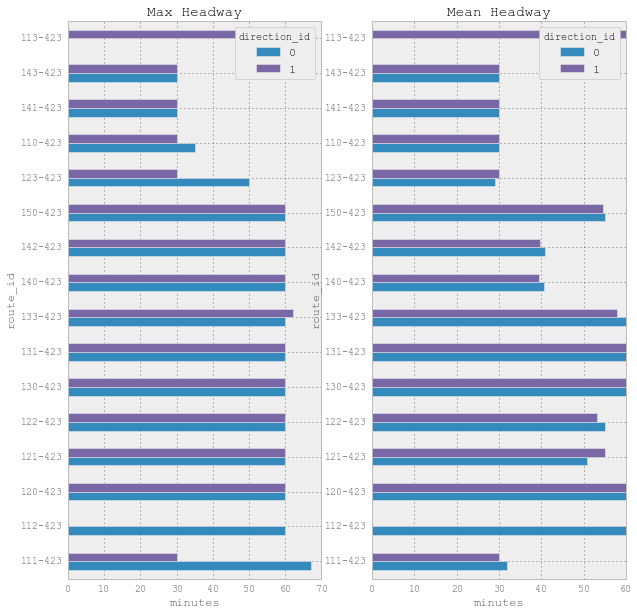

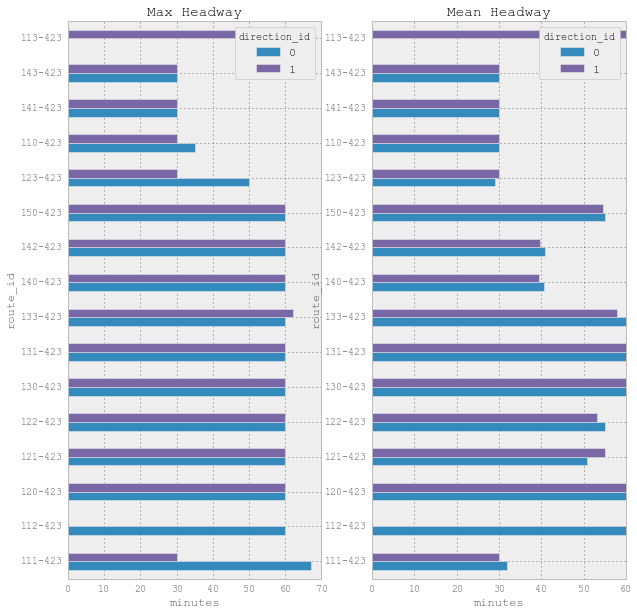

In [15]:
gt.plot_headways(routes_stats)

In [16]:
# Compute routes time series
rts = gt.compute_routes_time_series(feed, trips_stats, date, split_directions=True)
rts = gt.downsample(rts, freq='6H')
rts.head()

indicator           num_trip_starts                                      \
route_id                    110-423     110N-423    111-423     112-423   
direction_id                      0   1        0  1       0   1       0   
2014-05-30 00:00:00               1   0        4  5       0   0       0   
2014-05-30 06:00:00              12  10        0  0      12  10       5   
2014-05-30 12:00:00              12  12        0  0      12  12       6   
2014-05-30 18:00:00               5   7        0  0       5   7       4   

indicator                                 ...     service_speed             \
route_id            113-423    120-423    ...           142-423              
direction_id              0  1       0    ...                 0          1   
2014-05-30 00:00:00       0  0       1    ...               NaN        NaN   
2014-05-30 06:00:00       3  0       6    ...         25.915381  26.179643   
2014-05-30 12:00:00       0  2       6    ...         26.726927  26.179643   
2014-05-30 18:00:00       0  1       4    ...         26.726927  26.179643   

indicator                                                                  \
route_id               143-423              143W-423              150-423   
direction_id                 0          1          0         1          0   
2014-05-30 00:00:00        NaN        NaN        NaN       NaN        NaN   
2014-05-30 06:00:00  23.352055  25.496372        NaN       NaN  31.820862   
2014-05-30 12:00:00  23.352055  25.496372        NaN       NaN  31.820862   
2014-05-30 18:00:00  23.352055  25.496372  30.907527  29.87017  31.820862   

indicator                                             
route_id                         150E-423             
direction_id                 1          0          1  
2014-05-30 00:00:00        NaN        NaN        NaN  
2014-05-30 06:00:00  31.278634        NaN        NaN  
2014-05-30 12:00:00  31.278634        NaN        NaN  
2014-05-30 18:00:00  31.278634  33.833209  34.409551  

[4 rows x 200 columns]

In [17]:
fts = gt.compute_feed_time_series(feed, trips_stats, date, freq='1H')
gt.downsample(fts, freq='4H').head()


,num_trip_starts,service_distance,service_duration,num_trips,service_speed
2014-05-30 00:00:00,12,423.588152,8.850000,2.212500,47.863068
2014-05-30 04:00:00,81,1463.148646,49.183333,12.295833,29.748871
2014-05-30 08:00:00,164,3650.067131,128.216667,32.054167,28.467962
2014-05-30 12:00:00,162,3507.673152,123.350000,30.837500,28.436750
2014-05-30 16:00:00,149,3511.544548,119.900000,29.975000,29.287277


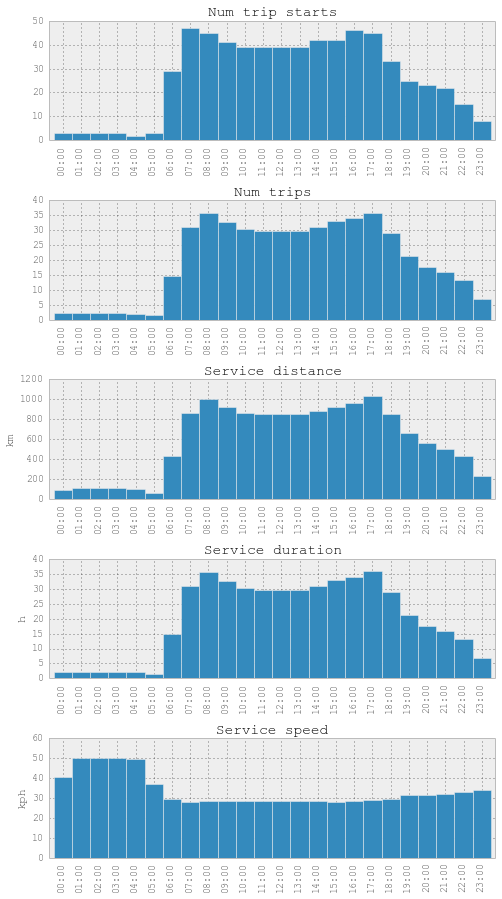

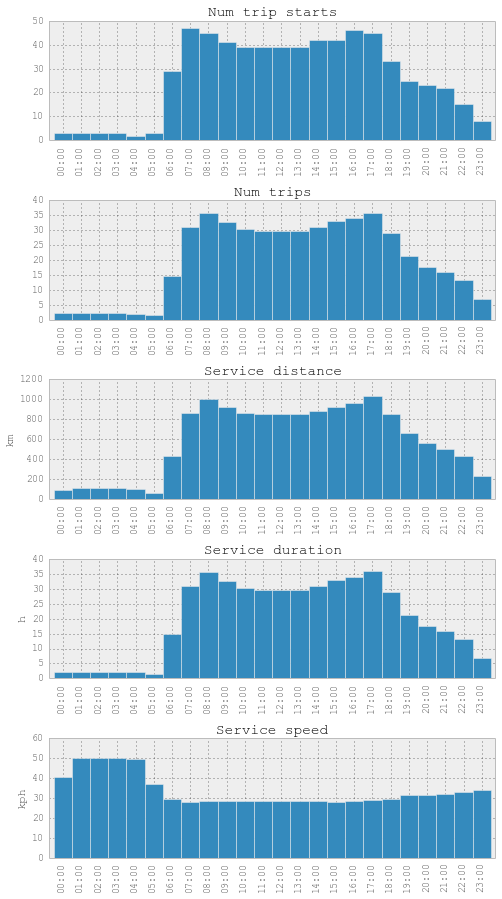

In [18]:
gt.plot_feed_time_series(fts)

In [19]:
# Get trip locations for every hour of the given date
rng = pd.date_range('1/1/2000', periods=24, freq='H')
times = [t.strftime('%H:%M:%S') for t in rng]
loc = gt.compute_trips_locations(feed, date, times)
loc.head()

,trip_id,rel_dist,time,route_id,direction_id,shape_id,lon,lat
0,CNS2014-CNS_MUL-Weekday-00-4165878,0.152945,06:00:00,110-423,0,1100023,145.669490,-16.762839
1,CNS2014-CNS_MUL-Weekday-00-4165879,0.720587,07:00:00,110-423,0,1100023,145.732413,-16.865060
2,CNS2014-CNS_MUL-Weekday-00-4165880,0.152945,07:00:00,110-423,0,1100023,145.669490,-16.762839
3,CNS2014-CNS_MUL-Weekday-00-4165881,0.720587,08:00:00,110-423,0,1100023,145.732413,-16.865060
4,CNS2014-CNS_MUL-Weekday-00-4165882,0.202283,08:00:00,110-423,0,1100023,145.675422,-16.768954


In [20]:
# Get a route timetable
route = feed.routes['route_id'].iat[0]
gt.get_route_timetable(feed, route, date).head().T

,0,1,2,3,4
route_id,110-423,110-423,110-423,110-423,110-423
service_id,CNS2014-CNS_MUL-Weekday-00,CNS2014-CNS_MUL-Weekday-00,CNS2014-CNS_MUL-Weekday-00,CNS2014-CNS_MUL-Weekday-00,CNS2014-CNS_MUL-Weekday-00
trip_id,CNS2014-CNS_MUL-Weekday-00-4165878,CNS2014-CNS_MUL-Weekday-00-4165878,CNS2014-CNS_MUL-Weekday-00-4165878,CNS2014-CNS_MUL-Weekday-00-4165878,CNS2014-CNS_MUL-Weekday-00-4165878
trip_headsign,The Pier Cairns Terminus,The Pier Cairns Terminus,The Pier Cairns Terminus,The Pier Cairns Terminus,The Pier Cairns Terminus
direction_id,0,0,0,0,0
block_id,NaN,NaN,NaN,NaN,NaN
shape_id,1100023,1100023,1100023,1100023,1100023
arrival_time,05:50:00,05:50:00,05:52:00,05:54:00,05:55:00
departure_time,05:50:00,05:50:00,05:52:00,05:54:00,05:55:00
stop_id,750337,750000,750001,750002,750003


In [21]:
# Get a stop time table
stop = feed.stops['stop_id'].iat[0]
gt.get_stop_timetable(feed, stop, date).head().T

,1,36,71,106,141
trip_id,CNS2014-CNS_MUL-Weekday-00-4165878,CNS2014-CNS_MUL-Weekday-00-4165879,CNS2014-CNS_MUL-Weekday-00-4165880,CNS2014-CNS_MUL-Weekday-00-4165881,CNS2014-CNS_MUL-Weekday-00-4165882
arrival_time,05:50:00,06:20:00,06:50:00,07:16:00,07:46:00
departure_time,05:50:00,06:20:00,06:50:00,07:16:00,07:46:00
stop_id,750000,750000,750000,750000,750000
stop_sequence,2,2,2,2,2
pickup_type,0,0,0,0,0
drop_off_type,0,0,0,0,0
shape_dist_traveled,0.46864,0.46864,0.46864,0.46864,0.46864
route_id,110-423,110-423,110-423,110-423,110-423
service_id,CNS2014-CNS_MUL-Weekday-00,CNS2014-CNS_MUL-Weekday-00,CNS2014-CNS_MUL-Weekday-00,CNS2014-CNS_MUL-Weekday-00,CNS2014-CNS_MUL-Weekday-00
